In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='whitegrid')

df = pd.read_csv('../data/weather_dataset.csv')
data = pd.DataFrame(df)

data.head()


,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [2]:
df.info()
print('--------------------------------------------------------------------')
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB
--------------------------------------------------------------------


,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


### 1.Find all the unique 'Wind speed' values in the data

In [3]:
data.head(2)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog


In [4]:
data.nunique()

Date/Time           8784
Temp_C               533
Dew Point Temp_C     489
Rel Hum_%             83
Wind Speed_km/h       34
Visibility_km         24
Press_kPa            518
Weather               50
dtype: int64

In [5]:
wind_speed = data["Wind Speed_km/h"]
print(f"unique wind speed count: {wind_speed.nunique()}")
print("--------------------------------------")
print("unique wind speed: ")
print(sorted(wind_speed.unique()))

unique wind speed count: 34
--------------------------------------
unique wind speed: 
[0, 2, 4, 6, 7, 9, 11, 13, 15, 17, 19, 20, 22, 24, 26, 28, 30, 32, 33, 35, 37, 39, 41, 43, 44, 46, 48, 50, 52, 54, 57, 63, 70, 83]


### 1.2 Wind Speed — Distribution
Now we visualize how frequently each wind speed occurs.  



Number of Unique Wind Speeds: 34
--------------------------------------
Wind Speed Values: [ 4  7  6  9 15 13 20 22 19 24 30 35 39 32 33 26 44 43 48 37 28 17 11  0
 83 70 57 46 41 52 50 63 54  2]


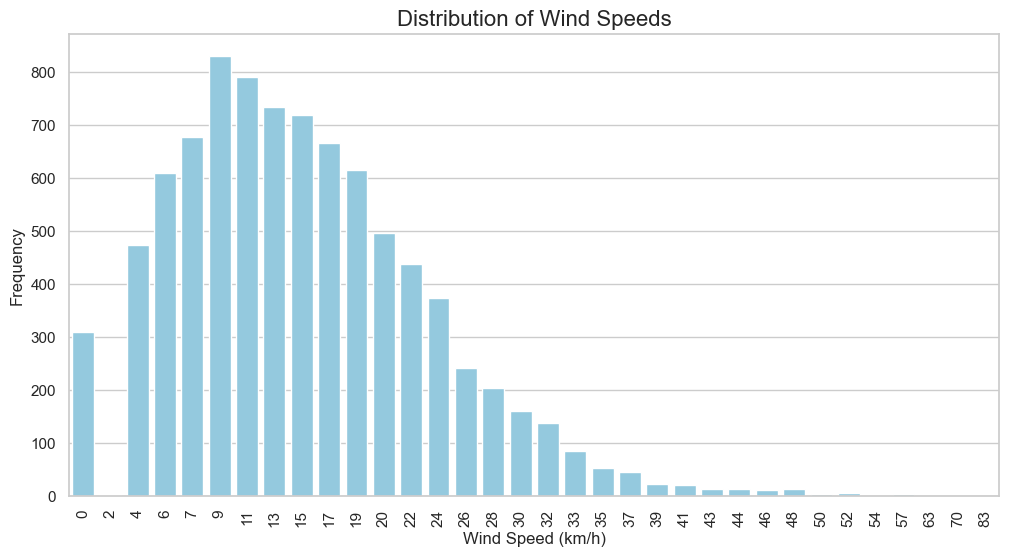

In [6]:
unique_count = data["Wind Speed_km/h"].nunique()
unique_values = data["Wind Speed_km/h"].unique()

print(f"Number of Unique Wind Speeds: {unique_count}")
print("--------------------------------------")
print("Wind Speed Values:", unique_values)

plt.figure(figsize=(12,6))
sns.countplot(x="Wind Speed_km/h", data=data, color="skyblue")

plt.title("Distribution of Wind Speeds", fontsize=16)
plt.xlabel("Wind Speed (km/h)")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()


### 1.3 Wind Speed — Binned Distribution (Histogram)
When many unique speeds exist, a histogram shows the overall shape more clearly.




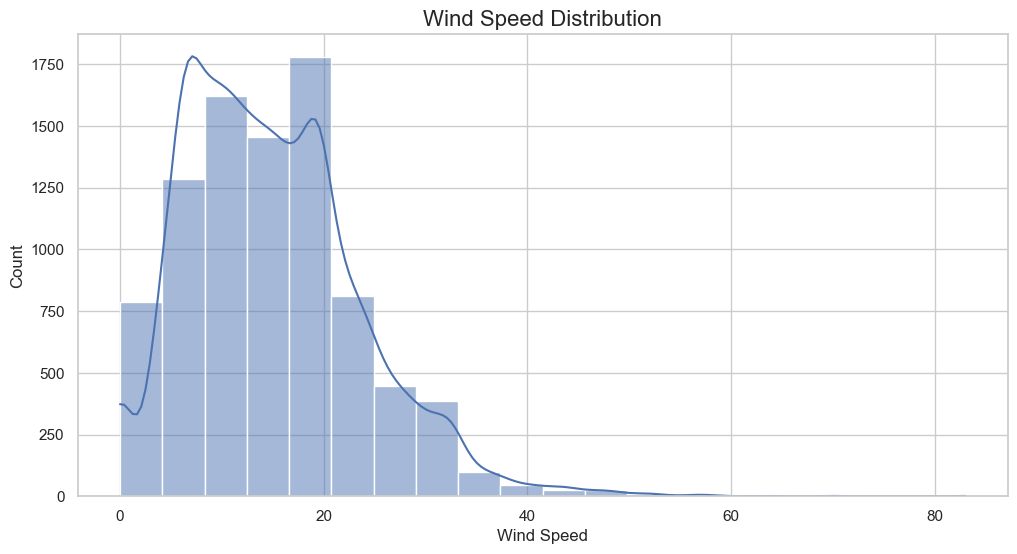

In [7]:
plt.figure(figsize=(12,6))
sns.histplot(data=data, x="Wind Speed_km/h", bins=20, kde=True)
plt.title("Wind Speed Distribution", fontsize=16)
plt.xlabel("Wind Speed")
plt.ylabel("Count")
plt.show()


### 2.1 Find the number of times when the 'Weather is exactly Clear'.
Here we calculate how many times the weather condition was recorded as **Clear**.  
This gives us an idea of how frequently clear weather occurred in 2012.

In [8]:
data.head(2)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog


In [9]:
clear_count = data[data['Weather']=='Clear'].shape[0]
print(f"Number of times Weather was 'Clear':{clear_count}")

Number of times Weather was 'Clear':1326


### 2.2 Frequency of All Weather Conditions

To put "Clear" into context, we check the frequency of **all weather types** in the dataset.  
This helps us see how common Clear weather is compared to other conditions.


In [10]:
data['Weather'].value_counts()

Weather
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                

### 2.3 Rows Where Weather is "Clear"

For further inspection, we display all rows where the weather condition was recorded as Clear.  
(Only the first few rows are shown here for brevity.)


In [11]:
data[data['Weather'] == 'Clear'].head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
67,1/3/2012 19:00,-16.9,-24.8,50,24,25.0,101.74,Clear
114,1/5/2012 18:00,-7.1,-14.4,56,11,25.0,100.71,Clear
115,1/5/2012 19:00,-9.2,-15.4,61,7,25.0,100.80,Clear
116,1/5/2012 20:00,-9.8,-15.7,62,9,25.0,100.83,Clear
117,1/5/2012 21:00,-9.0,-14.8,63,13,25.0,100.83,Clear


### 2.4 Visualization of Weather Conditions (Top 10)

To better understand the overall distribution of weather types, we plot the **Top 10 most frequent weather conditions**.  
This gives us a clear picture of which weather types were dominant throughout the year.


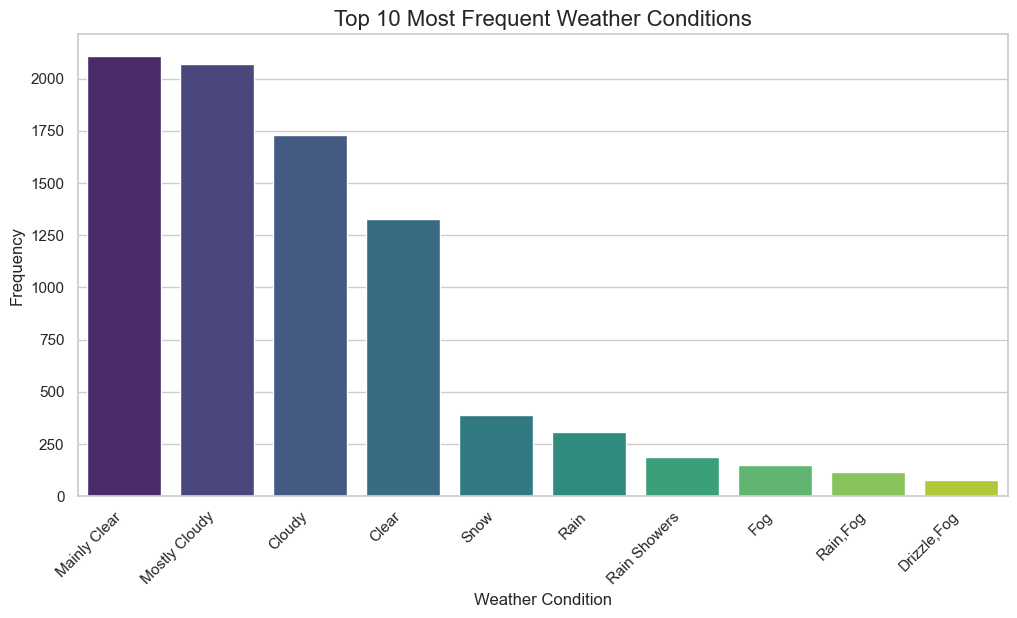

In [12]:

top_weather = data["Weather"].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x = top_weather.index , y = top_weather.values,hue=top_weather.index , palette = 'viridis')

plt.title("Top 10 Most Frequent Weather Conditions", fontsize=16)
plt.xlabel("Weather Condition")
plt.ylabel("Frequency")
plt.xticks(rotation = 45, ha ='right')
plt.show()

### 3.2 Rows Where Wind Speed = 4 km/h

We display a few rows where the wind speed was exactly 4 km/h for inspection.  
This helps us see what other weather conditions were present at that speed.


In [13]:
target_speed = 4
count = data[data["Wind Speed_km/h"]== target_speed].shape[0]
print(f"Number of times Wind Spedd was exactly {target_speed} km/h: {count}")

Number of times Wind Spedd was exactly 4 km/h: 474


In [14]:
data[data["Wind Speed_km/h"]==4].head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
96,1/5/2012 0:00,-8.8,-11.7,79,4,9.7,100.32,Snow
101,1/5/2012 5:00,-7.0,-9.5,82,4,4.0,100.19,Snow
146,1/7/2012 2:00,-8.1,-11.1,79,4,19.3,100.15,Cloudy


### 4. find out all the null values in the data

In [15]:
data.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [16]:
data.notnull().sum()

Date/Time           8784
Temp_C              8784
Dew Point Temp_C    8784
Rel Hum_%           8784
Wind Speed_km/h     8784
Visibility_km       8784
Press_kPa           8784
Weather             8784
dtype: int64

### 5. Rename the column name 'Weather' to 'Weather Condition'

In [17]:
data.rename(columns= {'Weather' :'Weather Condition'}, inplace=True)

In [18]:
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


### 5.2 mean of 'Visibility'

In [19]:
mean_visibility = data["Visibility_km"].mean()
print(f"Mean of Visibility: {mean_visibility:.2f} km")

Mean of Visibility: 27.66 km


### 5.3 Standard Deviation of 'Pressure'

In [20]:
std_pressure = data["Press_kPa"].std()
print(f"Standard Deviation of Pressure: {std_pressure:.2f} Kpa")

Standard Deviation of Pressure: 0.84 Kpa


### 5.4 Variance of 'Relative Humidity'

In [21]:
var_rh = data["Rel Hum_%"].var()
print(f"Variance of Relative Humidity:{var_rh:.2f} ")

Variance of Relative Humidity:286.25 


### 6. Find all instances when 'Snow' was recorded

We filter the dataset to find all rows where the **Weather Condition** column  
contains the word `'Snow'`.

In [22]:
data[data['Weather Condition'] == 'Snow'].head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
55,1/3/2012 7:00,-14.0,-19.5,63,19,25.0,100.95,Snow
84,1/4/2012 12:00,-13.7,-21.7,51,11,24.1,101.25,Snow
86,1/4/2012 14:00,-11.3,-19.0,53,7,19.3,100.97,Snow
87,1/4/2012 15:00,-10.2,-16.3,61,11,9.7,100.89,Snow
88,1/4/2012 16:00,-9.4,-15.5,61,13,19.3,100.79,Snow


In [23]:
snow_data = data[data["Weather Condition"].str.contains('Snow' , case = False, na =False)]
snow_data.head()


,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
41,1/2/2012 17:00,-2.1,-9.5,57,22,25.0,99.66,Snow Showers
44,1/2/2012 20:00,-5.6,-13.4,54,24,25.0,100.07,Snow Showers
45,1/2/2012 21:00,-5.8,-12.8,58,26,25.0,100.15,Snow Showers
47,1/2/2012 23:00,-7.4,-14.1,59,17,19.3,100.27,Snow Showers
48,1/3/2012 0:00,-9.0,-16.0,57,28,25.0,100.35,Snow Showers


#### 6.1 Count frequency of Snow conditions

We count how many times each **snow-related weather condition** occurs in the dataset.


In [24]:
snow_counts = data[data["Weather Condition"].str.contains("Snow" , case=False, na=False)]["Weather Condition"].value_counts()
snow_counts

Weather Condition
Snow                          390
Snow Showers                   60
Snow,Fog                       37
Snow,Blowing Snow              19
Rain,Snow                      18
Drizzle,Snow,Fog               15
Freezing Drizzle,Snow          11
Snow,Ice Pellets                6
Snow,Haze                       5
Moderate Snow                   4
Rain,Snow,Ice Pellets           4
Snow Showers,Fog                4
Rain Showers,Snow Showers       2
Drizzle,Snow                    2
Moderate Snow,Blowing Snow      2
Freezing Rain,Snow Grains       1
Snow Pellets                    1
Rain,Snow,Fog                   1
Rain,Snow Grains                1
Name: count, dtype: int64

#### 6.2 Visualize snow condition frequencies

We plot a bar chart of the different snow-related weather conditions.


C:\Users\bayat\AppData\Local\Temp\ipykernel_4628\944531637.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=snow_counts.index, y=snow_counts.values , palette = "Blues_d")


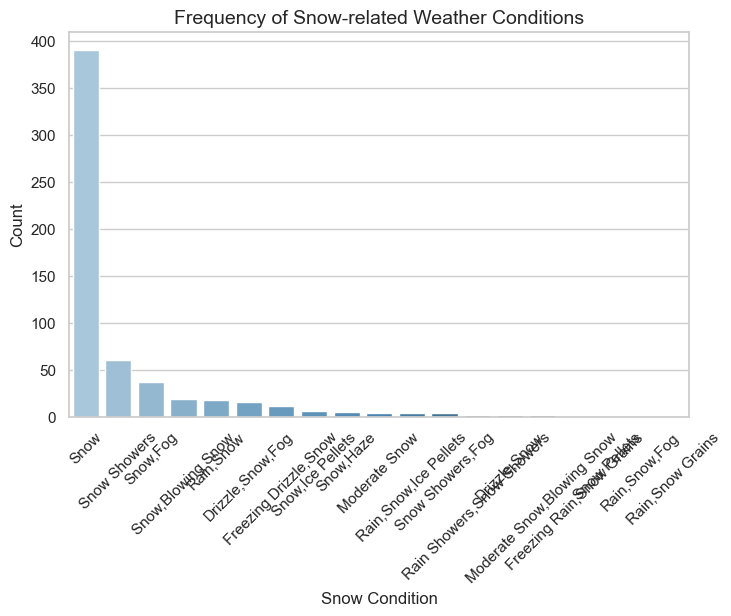

In [25]:
plt.figure(figsize=(8,5))
sns.barplot(x=snow_counts.index, y=snow_counts.values , palette = "Blues_d")

plt.title("Frequency of Snow-related Weather Conditions", fontsize=14)
plt.xlabel("Snow Condition", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()

### 7. Find all instances when Wind Speed > 24 km/h and Visibility = 25 km

We filter the dataset for cases where:
- **Wind Speed** is greater than 24 km/h  
- **Visibility** is exactly 25 km


In [30]:
wind_vis_data = data[(data['Wind Speed_km/h'] > 24) & (data["Visibility_km"] == 25)]
wind_vis_data

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
23,1/1/2012 23:00,5.3,2.0,79,30,25.0,99.31,Cloudy
24,1/2/2012 0:00,5.2,1.5,77,35,25.0,99.26,Rain Showers
25,1/2/2012 1:00,4.6,0.0,72,39,25.0,99.26,Cloudy
26,1/2/2012 2:00,3.9,-0.9,71,32,25.0,99.26,Mostly Cloudy
27,1/2/2012 3:00,3.7,-1.5,69,33,25.0,99.30,Mostly Cloudy
...,...,...,...,...,...,...,...,...
8705,12/28/2012 17:00,-8.6,-12.0,76,26,25.0,101.34,Mainly Clear
8753,12/30/2012 17:00,-12.1,-15.8,74,28,25.0,101.26,Mainly Clear
8755,12/30/2012 19:00,-13.4,-16.5,77,26,25.0,101.47,Mainly Clear
8759,12/30/2012 23:00,-12.1,-15.1,78,28,25.0,101.52,Mostly Cloudy


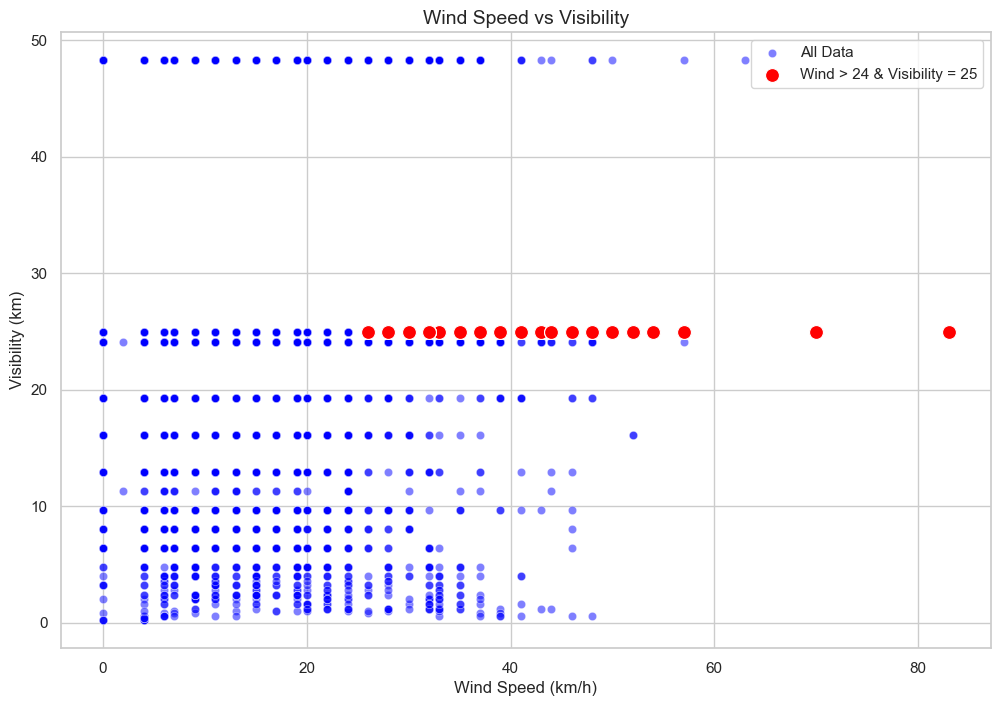

In [32]:
from cProfile import label


plt.figure(figsize=(12,8))

sns.scatterplot(data = data , x = "Wind Speed_km/h", y= "Visibility_km",
                alpha = 0.5 , color = "blue", label = "All Data")

sns.scatterplot(data = wind_vis_data ,x="Wind Speed_km/h", y="Visibility_km",
                color = "red" , s =100 , label = "Wind > 24 & Visibility = 25" )

plt.title("Wind Speed vs Visibility", fontsize=14)
plt.xlabel("Wind Speed (km/h)", fontsize=12)
plt.ylabel("Visibility (km)", fontsize=12)
plt.legend()
plt.show()